In [1]:
from utils import read_im, save_im, normalize
import matplotlib.pyplot as plt
import numpy as np




def convolve_im(im, kernel):
    """ A function that convolves im with kernel

    Args:
        im ([type]): [np.array of shape [H, W, 3]]
        kernel ([type]): [np.array of shape [K, K]]
    Returns:
        [type]: [np.array of shape [H, W, 3]. should be same as im]
    """
 

    # Flip the kernel for convolution
    kernel = np.flipud(np.fliplr(kernel))
    # Get dimensions
    H, W, C = im.shape
    kH, kW = kernel.shape

    # Output dimensions
    out_H = H - kH + 1
    out_W = W - kW + 1
    out = np.zeros((out_H, out_W, C), dtype=float)

    for c in range(C):
        for h in range(out_H):
            for w in range(out_W):
                # Define the window explicitly for clarity
                top = h
                bottom = h + kH
                left = w
                right = w + kW

                window = im[top:bottom, left:right, c]
                out[h, w, c] = np.sum(window * kernel)

    return normalize(out)


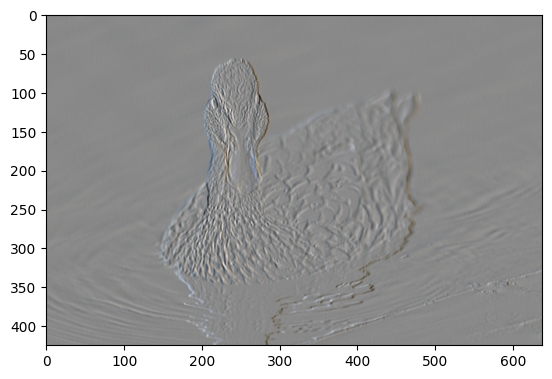

In [2]:
h_a = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

im = read_im("images/duck.jpeg")
im_sobel = convolve_im(im, h_a)
im_sobel = normalize(im_sobel)

plt.imshow(im_sobel)
save_im("results/duck_sobel.jpeg", im_sobel)

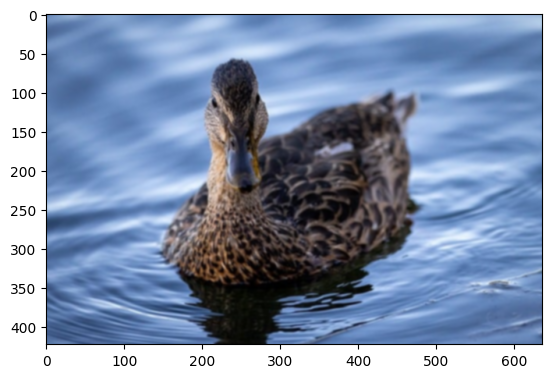

In [3]:
h_b = 1 / 256  * np.array([
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1]
    ])
 
im_smoothed = convolve_im(im, h_b)
im_smoothed = normalize(im_smoothed)

plt.imshow(im_smoothed, cmap='gray')
save_im("results/duck_smoothed.jpeg", im_smoothed)